In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
titanic_data = sns.load_dataset('titanic')
# do not assign the result of dropna when using inplace=True — that returns None
# either use inplace=True without assignment, or assign the returned DataFrame.
titanic_data = titanic_data.dropna(subset=['age','embarked'])

titanic_data = pd.get_dummies(titanic_data,columns=['sex',
                                                    'embarked',
                                                    "class",
                                                    "who",
                                                    "deck"],drop_first=True)

x=titanic_data.drop(columns=['survived',
                             'alive',
                             'embark_town',
                             'adult_male',
                             'alone'],axis=1)
y=titanic_data['survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
input_layer=tf.keras.layers.Dense(10,activation="relu",input_shape=(x_train.shape[1],))
hidden_layer1=tf.keras.layers.Dense(8,activation="relu")
hidden_layer2=tf.keras.layers.Dense(6,activation="relu")
output_layer=tf.keras.layers.Dense(1,activation="sigmoid")

model=tf.keras.models.Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    output_layer
])
model.compile(optimizer="adam",
              loss="mean_squared_error",
            #   metrics=["mae"]
            )

In [4]:
model.fit(x_train,y_train,epochs=100,
          batch_size=32,
          validation_split=0.,
          verbose=1)

loss=model.evaluate(x_test,y_test)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.2603
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2295
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2104
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2014
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1929
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1609
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1552
Epoch 13/100
18/18 [=================

In [5]:
print(f"Test Loss: {loss}")

Test Loss: 0.1714123636484146


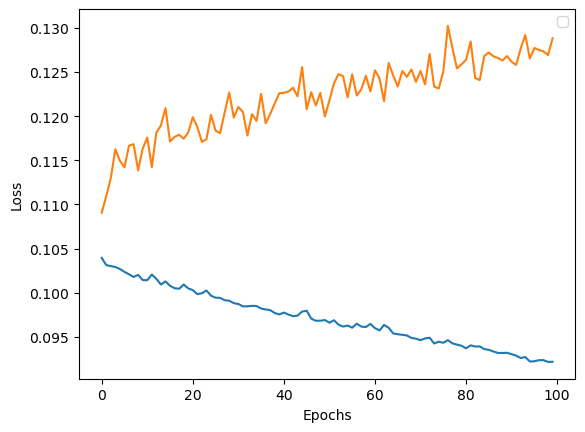

In [6]:
history=model.fit(x_train,y_train,epochs=100,
          batch_size=32,
          validation_split=0.2,
          verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('Training Loss','val_loss')
plt.show()